**Brian Blaylock**  
*February 15, 2021*

# 🎨 Paint: Color scales for matplotlib

## Standard Paint: NWS Colorscales

In [1]:
from paint.standard import *

In [7]:
import matplotlib as mpl
#mpl.use('Agg') # Uncomment if you don't want to display the figure.

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import matplotlib as mpl

def cm_wind(display_cmap=False, continuous=False, 
            fixed=False,
            vmin=0, vmax=140):
    """
    Colormap for wind speed (m/s).
    
    .. image:: _static/BB_cmap/cm_wind.png
    
    Parameters
    ----------
    display_cmap : bool
        If True, show just the cmap
    """
    label = r'Wind Speed (m s$\mathregular{^{-1}}$)'
    
    # Color tuple for every bin
    COLORS = np.array([
       '#103f78', '#225ea8', '#1d91c0', '#41b6c4',
       '#7fcdbb', '#b4d79e', '#dfff9e', '#ffffa6',
       '#ffe873', '#ffc400', '#ffaa00', '#ff5900',
       '#ff0000', '#a80000', '#6e0000', '#ffbee8',
       '#ff73df'
    ])

    bounds = np.array([0,5,10,15,20,25,30,35,40,45,50,60,70,80,100,120,140])
    
    if continuous:
        cmap = colors.LinearSegmentedColormap.from_list("Wind Speed", COLORS)
        norm = colors.Normalize(vmin, vmax)
    else:
        logic = np.logical_and(bounds >=vmin, bounds <= vmax)
        if not fixed:
            COLORS = COLORS[logic]
            BOUNDS = bounds[logic]
        cmap = colors.LinearSegmentedColormap.from_list("Wind Speed", COLORS,
                                                        N=len(COLORS)+1)
        
        norm = colors.BoundaryNorm(boundaries=bounds, ncolors=len(bounds))
    
    if display_cmap:
        fig = plt.figure(figsize=(8, 3))
        ax = fig.add_axes([0.05, 0.80, 0.9, 0.1])
        cb = mpl.colorbar.ColorbarBase(ax, orientation='horizontal', 
                                       cmap=cmap, norm=norm, label=label,
                                       ticks=bounds, spacing='proportional',
                                       extend='max')
    
    return {'cmap': cmap, 'norm': norm}, \
           {'label': label, 'ticks': bounds, 'spacing': 'proportional', 'extend':'max'}
    

({'cmap': <matplotlib.colors.LinearSegmentedColormap at 0x2ab4bf4b0b50>,
  'norm': <matplotlib.colors.Normalize at 0x2ab4c77cef90>},
 {'label': 'Wind Speed (m s$\\mathregular{^{-1}}$)',
  'ticks': array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  60,  70,
          80, 100, 120, 140]),
  'spacing': 'proportional',
  'extend': 'max'})

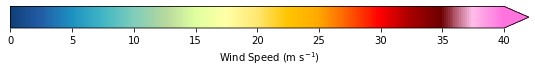

In [12]:
cm_wind(True, continuous=5, vmax=40, fixed=False)